### Importing required libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Reading the dataset

In [2]:
dataset = pd.read_csv('Shipping_Prediction.csv')
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
dataset['Reached.on.Time_Y.N']==0

0        False
1        False
2        False
3        False
4        False
         ...  
10994    False
10995     True
10996     True
10997     True
10998     True
Name: Reached.on.Time_Y.N, Length: 10999, dtype: bool

In [4]:
dataset.tail()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


In [5]:
# Shape of the dataset
dataset.shape

(10999, 12)

In [6]:
#Information about the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
#Checking if there is any null values in the dataset
dataset.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [8]:
#Basic summary statistics
dataset.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## Exploratory Data Analysis

In [9]:
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


([<matplotlib.patches.Wedge at 0x1daf89d2190>,
 [Text(0.32902377754583456, 1.0496396304491695, '0'),
  Text(-0.32902377754583423, -1.0496396304491697, '1')],
 [Text(0.17946751502500063, 0.5725307075177288, '40.33%'),
  Text(-0.17946751502500047, -0.5725307075177288, '59.67%')])

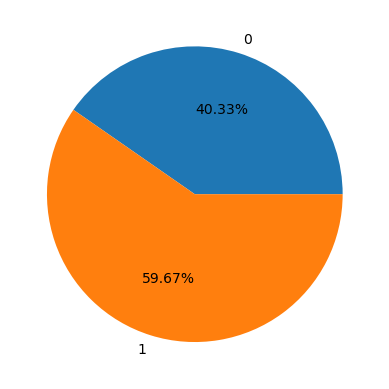

In [10]:
delay=pd.DataFrame(dataset.groupby(['Reached.on.Time_Y.N'])['ID'].count()/len(dataset)).reset_index()
plt.pie(delay['ID'],labels=delay['Reached.on.Time_Y.N'],autopct='%1.2f%%')

In [11]:
data_v1 = dataset[dataset['Reached.on.Time_Y.N']==0]

Text(0, 0.5, 'percentage')

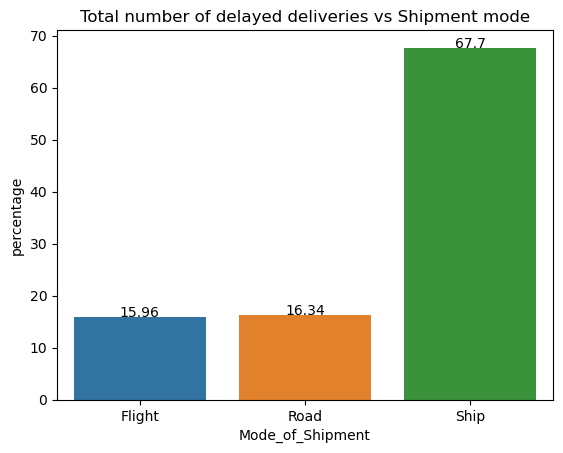

In [12]:
data_v2=pd.DataFrame((data_v1.groupby(['Mode_of_Shipment'])['ID'].count())/len(data_v1)*100)
data_v2=data_v2.reset_index()
visual=sns.barplot(x="Mode_of_Shipment", y="ID", data=data_v2 )
for index, row in data_v2.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total number of delayed deliveries vs Shipment mode')
plt.ylabel('percentage')

Text(0, 0.5, 'percentage')

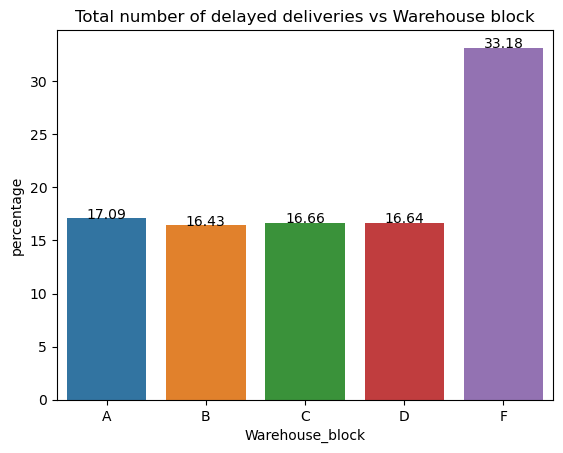

In [13]:
data_v3=pd.DataFrame((data_v1.groupby(['Warehouse_block'])['ID'].count())/len(data_v1)*100)
data_v3=data_v3.reset_index()
visual=sns.barplot(x="Warehouse_block", y="ID", data=data_v3 )
for index, row in data_v3.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total number of delayed deliveries vs Warehouse block')
plt.ylabel('percentage')

Text(0, 0.5, 'percentage')

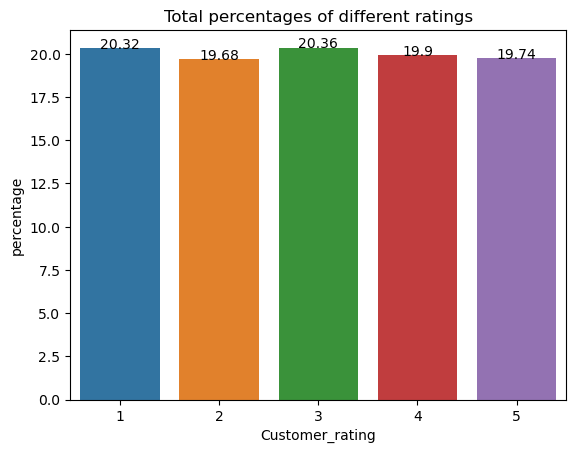

In [14]:
data_v4=pd.DataFrame((dataset.groupby(['Customer_rating'])['ID'].count())/len(dataset)*100)
data_v4=data_v4.reset_index()
visual=sns.barplot(x="Customer_rating", y="ID", data=data_v4 )
for index, row in data_v4.iterrows():
    visual.text(row.name,row.ID, round(row.ID,2), color='black', ha="center")
plt.title('Total percentages of different ratings')
plt.ylabel('percentage')

In [15]:
dataset['Reached.on.Time_Y.N'].replace({1 : "Yes", 0: "No"}, inplace = True)

In [16]:
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,Yes
1,2,F,Flight,4,5,216,2,low,M,59,3088,Yes
2,3,A,Flight,2,2,183,4,low,M,48,3374,Yes
3,4,B,Flight,3,3,176,4,medium,M,10,1177,Yes
4,5,C,Flight,2,2,184,3,medium,F,46,2484,Yes


Text(0.5, 1.0, 'Product importance by Reached on Time or Not')

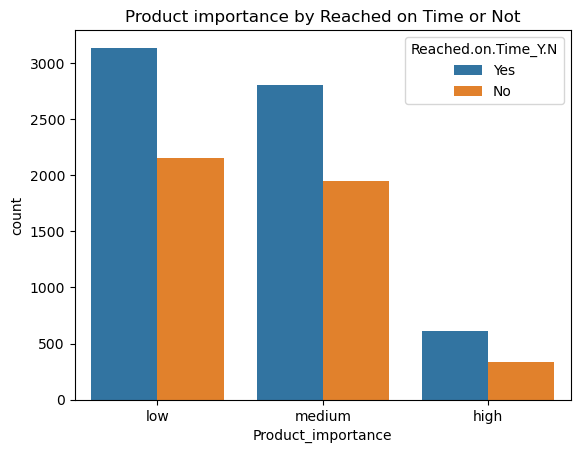

In [17]:
sns.countplot(x = "Product_importance", data = dataset, hue="Reached.on.Time_Y.N")
plt.title("Product importance by Reached on Time or Not")

Text(0.5, 1.0, 'Gender by Reached on Time or Not')

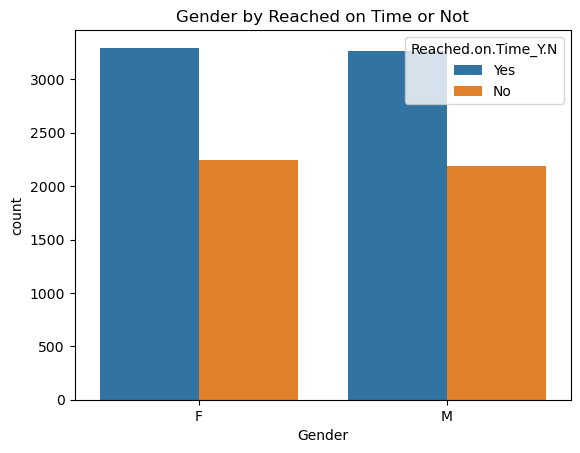

In [18]:
sns.countplot(x = "Gender", data = dataset, hue="Reached.on.Time_Y.N")
plt.title("Gender by Reached on Time or Not")

Text(0.5, 1.0, 'Warehouse block vs on Time or Not')

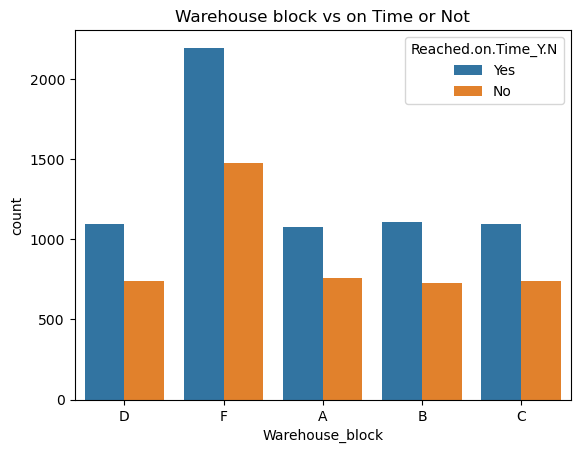

In [19]:
sns.countplot(x = "Warehouse_block", data = dataset, hue = 'Reached.on.Time_Y.N' )
plt.title("Warehouse block vs on Time or Not")

Text(0.5, 1.0, 'Customer ratings by Gender')

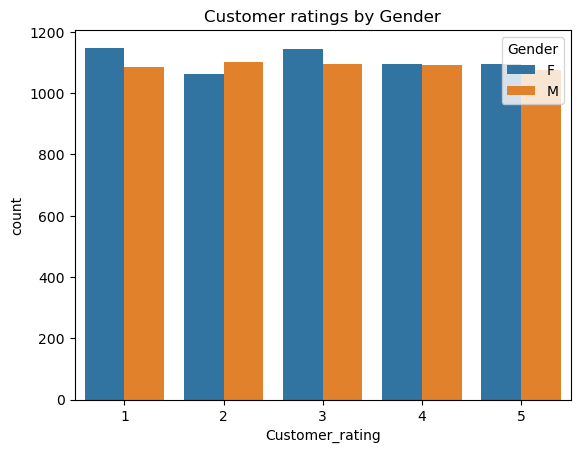

In [20]:
sns.countplot(x = "Customer_rating", data = dataset, hue="Gender")
plt.title("Customer ratings by Gender")

Text(0.5, 1.0, 'Amount spent by each Gender')

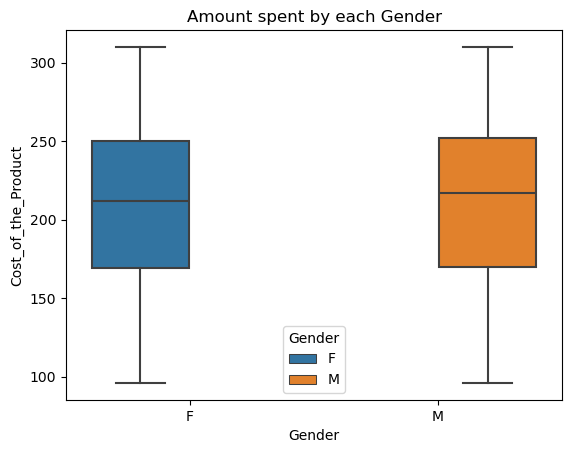

In [21]:
sns.boxplot(x='Gender',y='Cost_of_the_Product',data=dataset,hue='Gender')
plt.title("Amount spent by each Gender")

Text(0.5, 1.0, 'Average cost of products of different importance')

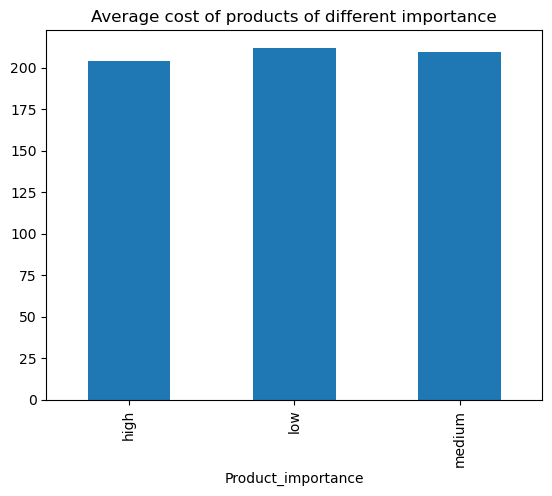

In [22]:
dataset.groupby(['Product_importance'])['Cost_of_the_Product'].mean().plot.bar()
plt.title("Average cost of products of different importance")

In [23]:
dataset.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,Yes
1,2,F,Flight,4,5,216,2,low,M,59,3088,Yes
2,3,A,Flight,2,2,183,4,low,M,48,3374,Yes
3,4,B,Flight,3,3,176,4,medium,M,10,1177,Yes
4,5,C,Flight,2,2,184,3,medium,F,46,2484,Yes


array([[<Axes: title={'center': 'Cost_of_the_Product'}>,
        <Axes: title={'center': 'Prior_purchases'}>],
       [<Axes: title={'center': 'Discount_offered'}>,
        <Axes: title={'center': 'Weight_in_gms'}>]], dtype=object)

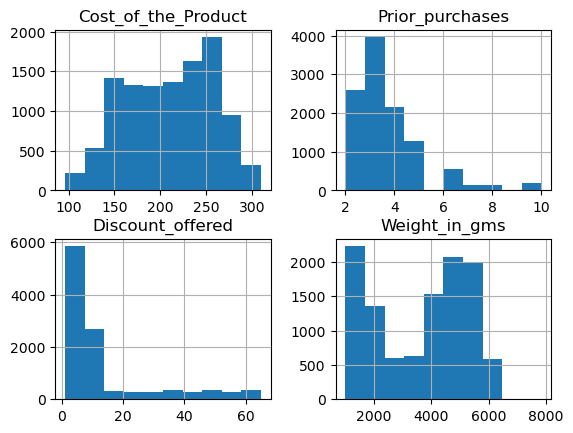

In [24]:
dataset[['Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']].hist()

### Handling outliners

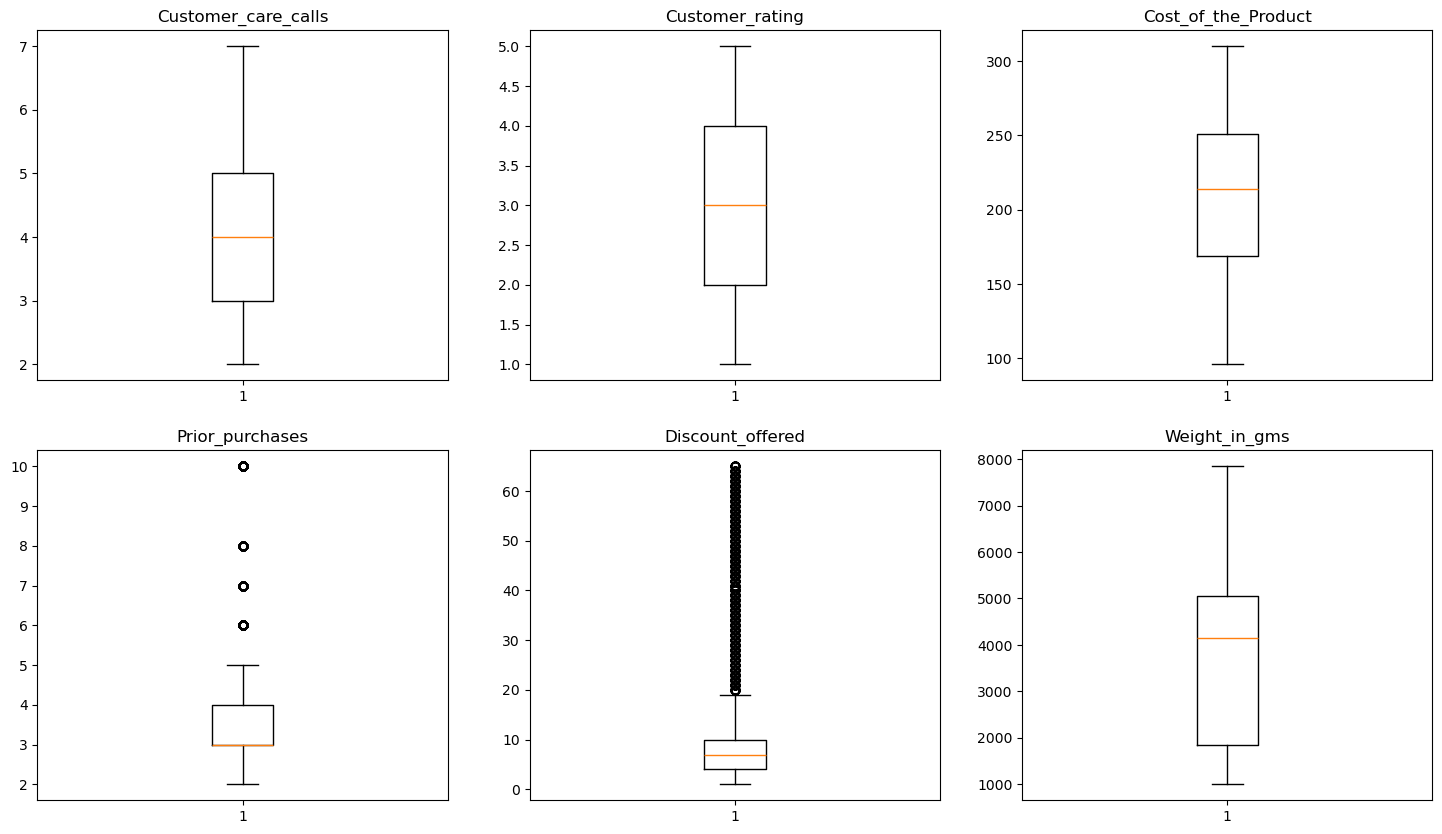

In [25]:
C=0
plt.figure(figsize=(18, 10))
for i in dataset.drop(columns=[
    'Warehouse_block', 'Mode_of_Shipment', 'Gender', 'Reached.on.Time_Y.N', 'ID' ]).columns:
    if str(dataset[i].dtype)=='object':
        continue
    plt.subplot(2, 3, C+1)
    plt.boxplot(dataset[i])
    plt.title(i)
    C+=1
plt.show()

In [26]:
def check_outliers(arr):
    Q1 = np.percentile(arr, 25, interpolation = 'midpoint') 
    Q3 = np.percentile(arr, 75, interpolation = 'midpoint') 
    IQR = Q3 - Q1

#Above Upper bound 
    upper=Q3+1.5*IQR
    upper_array=np.array(arr>=upper)
    print(' '*3,len(upper_array[upper_array == True]), 'are over the upper bound:', upper)

    #BeLow Lower bound
    lower=Q1-1.5*IQR
    lower_array=np.array(arr<=lower)
    print(' '*3, len(lower_array[lower_array == True]), 'are less than the lower bound:', lower, '\n')

for i in dataset.drop(columns=[ 'Warehouse_block', 'Mode_of_Shipment', 'Gender', 'Reached.on.Time_Y.N', 'ID' ]).columns:
    if str(dataset[i].dtype)=='object':
        continue
    print(i)
    check_outliers(dataset[i])

Customer_care_calls
    0 are over the upper bound: 8.0
    0 are less than the lower bound: 0.0 

Customer_rating
    0 are over the upper bound: 7.0
    0 are less than the lower bound: -1.0 

Cost_of_the_Product
    0 are over the upper bound: 374.0
    0 are less than the lower bound: 46.0 

Prior_purchases
    1003 are over the upper bound: 5.5
    0 are less than the lower bound: 1.5 

Discount_offered
    2262 are over the upper bound: 19.0
    0 are less than the lower bound: -5.0 

Weight_in_gms
    0 are over the upper bound: 9865.75
    0 are less than the lower bound: -2976.25 



C:\Users\ramak\AppData\Local\Temp\ipykernel_1576\2026037688.py:20: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  check_outliers(dataset[i])


## Data preprocessing

In [27]:
#Dropping the ID column because of high cardinality
data=dataset.drop(['ID'],axis=1)
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,Yes
1,F,Flight,4,5,216,2,low,M,59,3088,Yes
2,A,Flight,2,2,183,4,low,M,48,3374,Yes
3,B,Flight,3,3,176,4,medium,M,10,1177,Yes
4,C,Flight,2,2,184,3,medium,F,46,2484,Yes


### Chi square test of independence

In [28]:
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [29]:
#Warehouse_block
crossTab = pd.crosstab(data['Warehouse_block'], data['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.8959524278243698


In [30]:
crossTab = pd.crosstab(data['Mode_of_Shipment'],data['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.6895487627593786


In [31]:
# Product_importance
crossTab = pd.crosstab(data['Product_importance'],data['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.002230383104745087


In [32]:
# Gender
crossTab = pd.crosstab(data['Gender'],data['Reached.on.Time_Y.N'])
ChiSqResult = chi2_contingency(crossTab)
print("p-value ",ChiSqResult[1])

p-value  0.6367032124181522


##### From chi square test, we can conclude that three of the independent categorical features are not related to the response variable
##### beacause the p value is greater than 0.05. So, these features can be removed and only product importance feature can be included

In [33]:
#Renaming the column Reached.on.Time_Y.N
data.rename(columns={'Reached.on.Time_Y.N':'Reached on Time'}, inplace=True)

In [34]:
data['Reached on Time'].replace({"Yes" : 1, "No" : 0}, inplace = True)

In [35]:
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached on Time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [36]:

X=data.drop(['Reached on Time','Warehouse_block','Mode_of_Shipment','Gender'],axis=1)
y=data['Reached on Time']
X

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,4,2,177,3,low,44,1233
1,4,5,216,2,low,59,3088
2,2,2,183,4,low,48,3374
3,3,3,176,4,medium,10,1177
4,2,2,184,3,medium,46,2484
...,...,...,...,...,...,...,...
10994,4,1,252,5,medium,1,1538
10995,4,1,232,5,medium,6,1247
10996,5,4,242,5,low,4,1155
10997,5,2,223,6,medium,2,1210


In [37]:
X['Product_importance'].replace({"low" : 0, "medium" : 1 ,"high" : 2}, inplace = True)

In [38]:
X.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,4,2,177,3,0,44,1233
1,4,5,216,2,0,59,3088
2,2,2,183,4,0,48,3374
3,3,3,176,4,1,10,1177
4,2,2,184,3,1,46,2484


In [39]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Reached on Time, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

#Scaling the data
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.fit_transform(X_test)

### Models

In [41]:
svm_model = svm.SVC(gamma='auto',C=5,kernel='rbf')
svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.90      0.68      1312
           1       0.88      0.51      0.65      1988

    accuracy                           0.66      3300
   macro avg       0.71      0.70      0.66      3300
weighted avg       0.75      0.66      0.66      3300



In [42]:
print(confusion_matrix(y_test,y_pred))

[[1175  137]
 [ 976 1012]]


In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
predLR=lr.predict(X_test)
print(classification_report(y_test,predLR))

              precision    recall  f1-score   support

           0       0.54      0.58      0.56      1312
           1       0.71      0.67      0.69      1988

    accuracy                           0.64      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.64      0.64      0.64      3300



In [45]:
print(confusion_matrix(y_test,predLR))

[[ 766  546]
 [ 649 1339]]


In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
df=DecisionTreeClassifier(criterion='entropy',random_state=0)
df.fit(X_train,y_train)
preddf=df.predict(X_test)
print(classification_report(y_test,preddf))

              precision    recall  f1-score   support

           0       0.56      0.59      0.58      1312
           1       0.72      0.70      0.71      1988

    accuracy                           0.66      3300
   macro avg       0.64      0.64      0.64      3300
weighted avg       0.66      0.66      0.66      3300



In [48]:
print(confusion_matrix(y_test,preddf))

[[ 774  538]
 [ 600 1388]]


In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
predknn=knn.predict(X_test)
print(classification_report(y_test,predknn))

              precision    recall  f1-score   support

           0       0.55      0.61      0.58      1312
           1       0.72      0.67      0.70      1988

    accuracy                           0.65      3300
   macro avg       0.64      0.64      0.64      3300
weighted avg       0.65      0.65      0.65      3300



In [51]:
print(confusion_matrix(y_test,predknn))

[[ 802  510]
 [ 655 1333]]


In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [53]:
nb.fit(X_train,y_train)  
prednb = nb.predict(X_test) 
print(classification_report(prednb,y_test)) 

              precision    recall  f1-score   support

           0       0.99      0.53      0.69      2446
           1       0.42      0.98      0.59       854

    accuracy                           0.65      3300
   macro avg       0.71      0.76      0.64      3300
weighted avg       0.84      0.65      0.66      3300



In [54]:
print(confusion_matrix(prednb,y_test))

[[1297 1149]
 [  15  839]]


In [55]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [56]:
import xgboost as xgb
xg=xgb.XGBClassifier()
xg.fit(X_train,y_train)
predxg = xg.predict(X_test)
print(classification_report(prednb,y_test))

              precision    recall  f1-score   support

           0       0.99      0.53      0.69      2446
           1       0.42      0.98      0.59       854

    accuracy                           0.65      3300
   macro avg       0.71      0.76      0.64      3300
weighted avg       0.84      0.65      0.66      3300



In [57]:
print(confusion_matrix(prednb,y_test))

[[1297 1149]
 [  15  839]]


In [91]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predrf = rf.predict(X_test)
print(classification_report(predrf,y_test))

              precision    recall  f1-score   support

           0       0.68      0.57      0.62      1570
           1       0.66      0.76      0.71      1730

    accuracy                           0.67      3300
   macro avg       0.67      0.66      0.66      3300
weighted avg       0.67      0.67      0.67      3300



In [92]:
print(confusion_matrix(predrf,y_test))

[[ 894  676]
 [ 418 1312]]


In [58]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [59]:
ab=AdaBoostClassifier()
gb=GradientBoostingClassifier()

In [60]:
ab.fit(X_train,y_train)


AdaBoostClassifier()

In [61]:
gb.fit(X_train,y_train)


GradientBoostingClassifier()

In [62]:
pred2= ab.predict(X_test)
pred3= gb.predict(X_test)

In [63]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.57      0.76      0.65      1312
           1       0.79      0.62      0.69      1988

    accuracy                           0.67      3300
   macro avg       0.68      0.69      0.67      3300
weighted avg       0.70      0.67      0.68      3300



In [64]:
print(confusion_matrix(y_test, pred2))

[[ 995  317]
 [ 765 1223]]


In [65]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.57      0.87      0.69      1312
           1       0.87      0.56      0.68      1988

    accuracy                           0.68      3300
   macro avg       0.72      0.72      0.68      3300
weighted avg       0.75      0.68      0.68      3300



In [66]:
print(confusion_matrix(y_test, pred3))

[[1138  174]
 [ 869 1119]]


### Evaluation before Tuning

In [67]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

def eval(name, model):
    y_pred = model.predict(X_test)
    result = []
    result.append(name)
    result.append("{:.2f}".format(accuracy_score(y_test, y_pred) * 100))
    result.append("{:.2f}".format(f1_score(y_test, y_pred) * 100)) 
    result.append("{:.2f}".format(recall_score(y_test, y_pred) * 100))
    result.append("{:.2f}".format(precision_score(y_test, y_pred) * 100))
    return result


In [68]:
model_list = {
    'Logistic Regression':lr,
    'XGBoost':xg,
    'Ada Boost':ab,
    'Gradient Boosting' : gb,
    'Support Vector Classifier': svm_model,
    'Naive Bias' : nb,
    'KNN' : knn,
    'Decision Tree' : df,
    
}


model_eval_info = []
for i in model_list.keys():
    model_eval_info.append(eval(i,model_list[i]))
model_eval_info = pd.DataFrame(model_eval_info, columns=['Name', 'Accuracy', 'fl_score', 'Recall', 'Precision'])
model_eval_info.to_csv('model_eval.csv')
model_eval_info

,Name,Accuracy,fl_score,Recall,Precision
0,Logistic Regression,63.79,69.15,67.35,71.03
1,XGBoost,66.76,70.89,67.20,75.01
2,Ada Boost,67.21,69.33,61.52,79.42
3,Gradient Boosting,68.39,68.21,56.29,86.54
4,Support Vector Classifier,66.27,64.52,50.91,88.08
5,Naive Bias,64.73,59.04,42.20,98.24
6,KNN,64.70,69.59,67.05,72.33
7,Decision Tree,65.52,70.92,69.82,72.07


### Hyperparametric Tuning

In [69]:
params = {'n_estimators':[150,500], 'criterion':['gini', 'entropy'], 'max_depth' : [7],
          'max_features' : [60,80,100]
         }
#Hyper parameter tuning
rf_model =GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,scoring='accuracy', n_jobs = -1, cv=7, verbose = 3)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
print(classification_report(y_test,y_pred))

Fitting 7 folds for each of 12 candidates, totalling 84 fits
              precision    recall  f1-score   support

           0       0.56      0.93      0.70      1312
           1       0.92      0.52      0.67      1988

    accuracy                           0.69      3300
   macro avg       0.74      0.73      0.68      3300
weighted avg       0.78      0.69      0.68      3300



In [86]:
rf_model.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 80, 'n_estimators': 150}

In [70]:
print(confusion_matrix(y_test,y_pred))

[[1222   90]
 [ 949 1039]]


In [71]:
params2 = {'min_child_weight' : [10,20],
          'gamma' : [1.5,2.0,2.5],
          'colsample_bytree' : [0.6,0.8,0.9],
          'max_depth' : [4,5,6]
          }
xgb1 = xgb.XGBClassifier(learning_rate=0.5, n_estimators = 100 , objective = 'binary:logistic', nthread=3)
fitmodelXGB = GridSearchCV(xgb1,param_grid = params2, cv=5, refit = True , scoring = "accuracy", n_jobs = -1, verbose = 3)
fitmodelXGB.fit(X_train,y_train)
y_pred1=fitmodelXGB.predict(X_test)
print(classification_report(y_test,y_pred1))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
              precision    recall  f1-score   support

           0       0.56      0.90      0.69      1312
           1       0.89      0.54      0.67      1988

    accuracy                           0.68      3300
   macro avg       0.73      0.72      0.68      3300
weighted avg       0.76      0.68      0.68      3300



In [87]:
fitmodelXGB.best_params_

{'colsample_bytree': 0.9, 'gamma': 2.5, 'max_depth': 5, 'min_child_weight': 20}

In [72]:
print(confusion_matrix(y_test,y_pred1))

[[1182  130]
 [ 918 1070]]


In [73]:
lg = LogisticRegression(n_jobs= -1 , random_state = 2)
params3 = {
    'C' : [6,8,10,15,20],
    'max_iter' : [60,80,100]
}
fitmodelLR = GridSearchCV(lg,param_grid = params3, cv=5, refit = True , scoring = "accuracy", n_jobs = -1, verbose = 3)
fitmodelLR.fit(X_train,y_train)
y_pred2=fitmodelLR.predict(X_test)
print(classification_report(y_test,y_pred2))

print("Best Score:")
print(fitmodelXGB.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
              precision    recall  f1-score   support

           0       0.54      0.59      0.57      1312
           1       0.71      0.67      0.69      1988

    accuracy                           0.64      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.65      0.64      0.64      3300

Best Score:
0.682295975629309


In [88]:
fitmodelLR.best_params_

{'C': 6, 'max_iter': 60}

In [74]:
print(confusion_matrix(y_test,y_pred2))

[[ 776  536]
 [ 653 1335]]


In [85]:
svc = svm.SVC(random_state =3)
params4 = {
    'kernel' : ['ploy','rbf'],
    'C' : [10,13],
    'gamma' : [4,5],
    'tol' : [1e-1,1e-2,1e-3]
}
fitmodelSVC = GridSearchCV(svc,param_grid = params4, cv=5, refit = True , scoring = "accuracy", n_jobs = -1, verbose = 3)
fitmodelSVC.fit(X_train,y_train)
y_pred3=fitmodelLR.predict(X_test)
print(classification_report(y_test,y_pred3))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\ramak\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ramak\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ramak\Anaconda\Lib\site-packages\sklearn\svm\_base.py", line 180, in fit
    self._validate_params()
  File "C:\Users\ramak\Anaconda\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ramak\Anaconda\Lib\site-packages\sklearn\ut

              precision    recall  f1-score   support

           0       0.54      0.59      0.57      1312
           1       0.71      0.67      0.69      1988

    accuracy                           0.64      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.65      0.64      0.64      3300



In [89]:
fitmodelSVC.best_params_

{'C': 10, 'gamma': 4, 'kernel': 'rbf', 'tol': 0.01}

In [93]:
print(confusion_matrix(y_test,y_pred3))

[[ 776  536]
 [ 653 1335]]


In [75]:
ann = Sequential()

In [76]:
ann.add(Dense(14,activation='relu'))
ann.add(Dense(26,activation='relu'))
ann.add(Dense(26,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))
ann.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [77]:

ann.fit(X_train, y_train, epochs=50, batch_size=15)

Epoch 1/50


514/514 [==============================] - 8s 3ms/step - loss: 0.5752 - accuracy: 0.6190
Epoch 2/50
514/514 [==============================] - 2s 3ms/step - loss: 0.5283 - accuracy: 0.6584
Epoch 3/50
514/514 [==============================] - 2s 3ms/step - loss: 0.5236 - accuracy: 0.6607
Epoch 4/50
514/514 [==============================] - 2s 3ms/step - loss: 0.5209 - accuracy: 0.6609
Epoch 5/50
514/514 [==============================] - 2s 3ms/step - loss: 0.5190 - accuracy: 0.6692
Epoch 6/50
514/514 [==============================] - 2s 3ms/step - loss: 0.5192 - accuracy: 0.6635
Epoch 7/50
514/514 [==============================] - 1s 3ms/step - loss: 0.5184 - accuracy: 0.6685
Epoch 8/50
514/514 [==============================] - 1s 3ms/step - loss: 0.5169 - accuracy: 0.6711
Epoch 9/50
514/514 [==============================] - 2s 3ms/step - loss: 0.5169 - accuracy: 0.6705
Epoch 10/50
514/514 [==============================] - 2s 3ms/step - loss: 0.5158 - accuracy: 0.67

In [78]:
predictions = (ann.predict(X_test) > 0.5)
print(classification_report(y_test,predictions))

104/104 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.56      0.69      0.62      1312
           1       0.76      0.64      0.69      1988

    accuracy                           0.66      3300
   macro avg       0.66      0.67      0.66      3300
weighted avg       0.68      0.66      0.66      3300



In [79]:
print(confusion_matrix(y_test,predictions))

[[ 910  402]
 [ 722 1266]]


### Evaluation after Tuning

In [90]:
def hyper_eval(name, model):
    y_pred_prob = model.predict(X_test)
    
    if y_pred_prob.ndim == 2 and y_pred_prob.shape[1] > 1:
        y_pred = y_pred_prob.argmax(axis=1)
    else:
        y_pred = (y_pred_prob >= 0.5).astype(int)  # For binary

    result = []
    result.append(name)
    result.append("{:.2f}".format(accuracy_score(y_test, y_pred) * 100))
    result.append("{:.2f}".format(f1_score(y_test, y_pred, average='weighted') * 100))
    result.append("{:.2f}".format(recall_score(y_test, y_pred, average='weighted') * 100))
    result.append("{:.2f}".format(precision_score(y_test, y_pred, average='weighted') * 100))
    return result

# Example usage:
model_list = {
    'Logistic Regression(Hyper)': fitmodelLR,
    'XGBoost(Hyper)': fitmodelXGB,
    'Random Forest(Hyper)': rf_model,
    'ANN': ann,
    'SVC' : fitmodelSVC
}

model_hyper_eval_info = []
for name, model in model_list.items():
    model_hyper_eval_info.append(hyper_eval(name, model))

model_hyper_eval_info = pd.DataFrame(model_hyper_eval_info, columns=['Name', 'Accuracy', 'F1_Score', 'Recall', 'Precision'])
model_hyper_eval_info.to_csv('model_hyper_eval.csv', index=False)
model_hyper_eval_info


104/104 [==============================] - 0s 3ms/step


,Name,Accuracy,F1_Score,Recall,Precision
0,Logistic Regression(Hyper),63.97,64.19,63.97,64.57
1,XGBoost(Hyper),68.24,67.98,68.24,76.09
2,Random Forest(Hyper),68.52,68.06,68.52,77.82
3,ANN,65.94,66.30,65.94,67.89
4,SVC,66.85,67.11,66.85,70.53


In [81]:
import pickle as pkl

In [82]:
pkl.dump(ms,open('ship_scaler_1.pkl','wb'))

In [83]:
import joblib
joblib.dump(ct,"shipct_n")

NameError: name 'ct' is not defined

In [ ]:
pkl.dump(rf_model,open('Shipping_n.pkl','wb'))

In [ ]:
pkl.dump(ab,open('Shipping_ab.pkl','wb'))